In [56]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus
from matplotlib.colors import ListedColormap
from matplotlib import style; style.use('ggplot')

In [57]:
# Load data
data = pd.read_csv('heart.csv')
arr = data.to_numpy()

data.head()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [58]:
# Process arrays
Y = data['target']
X = data.drop(['target'], axis = 1)

from sklearn.model_selection import train_test_split as tts
#xTrain, xTest, yTrain, yTest = tts(X, Y, test_size = 0.2, random_state = 1)
xTrain , yTrain = np.concatenate((arr[25:165,:-1], arr[166:-25,:-1])), np.concatenate((arr[25:165,-1], arr[166:-25,-1]))
xTest , yTest = np.concatenate((arr[0:25,:-1], arr[-25:,:-1])), np.concatenate((arr[0:25,-1], arr[-25:,-1]))

In [59]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [60]:
# Fitting the decision tree model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 10)
clf = clf.fit(xTrain, yTrain)

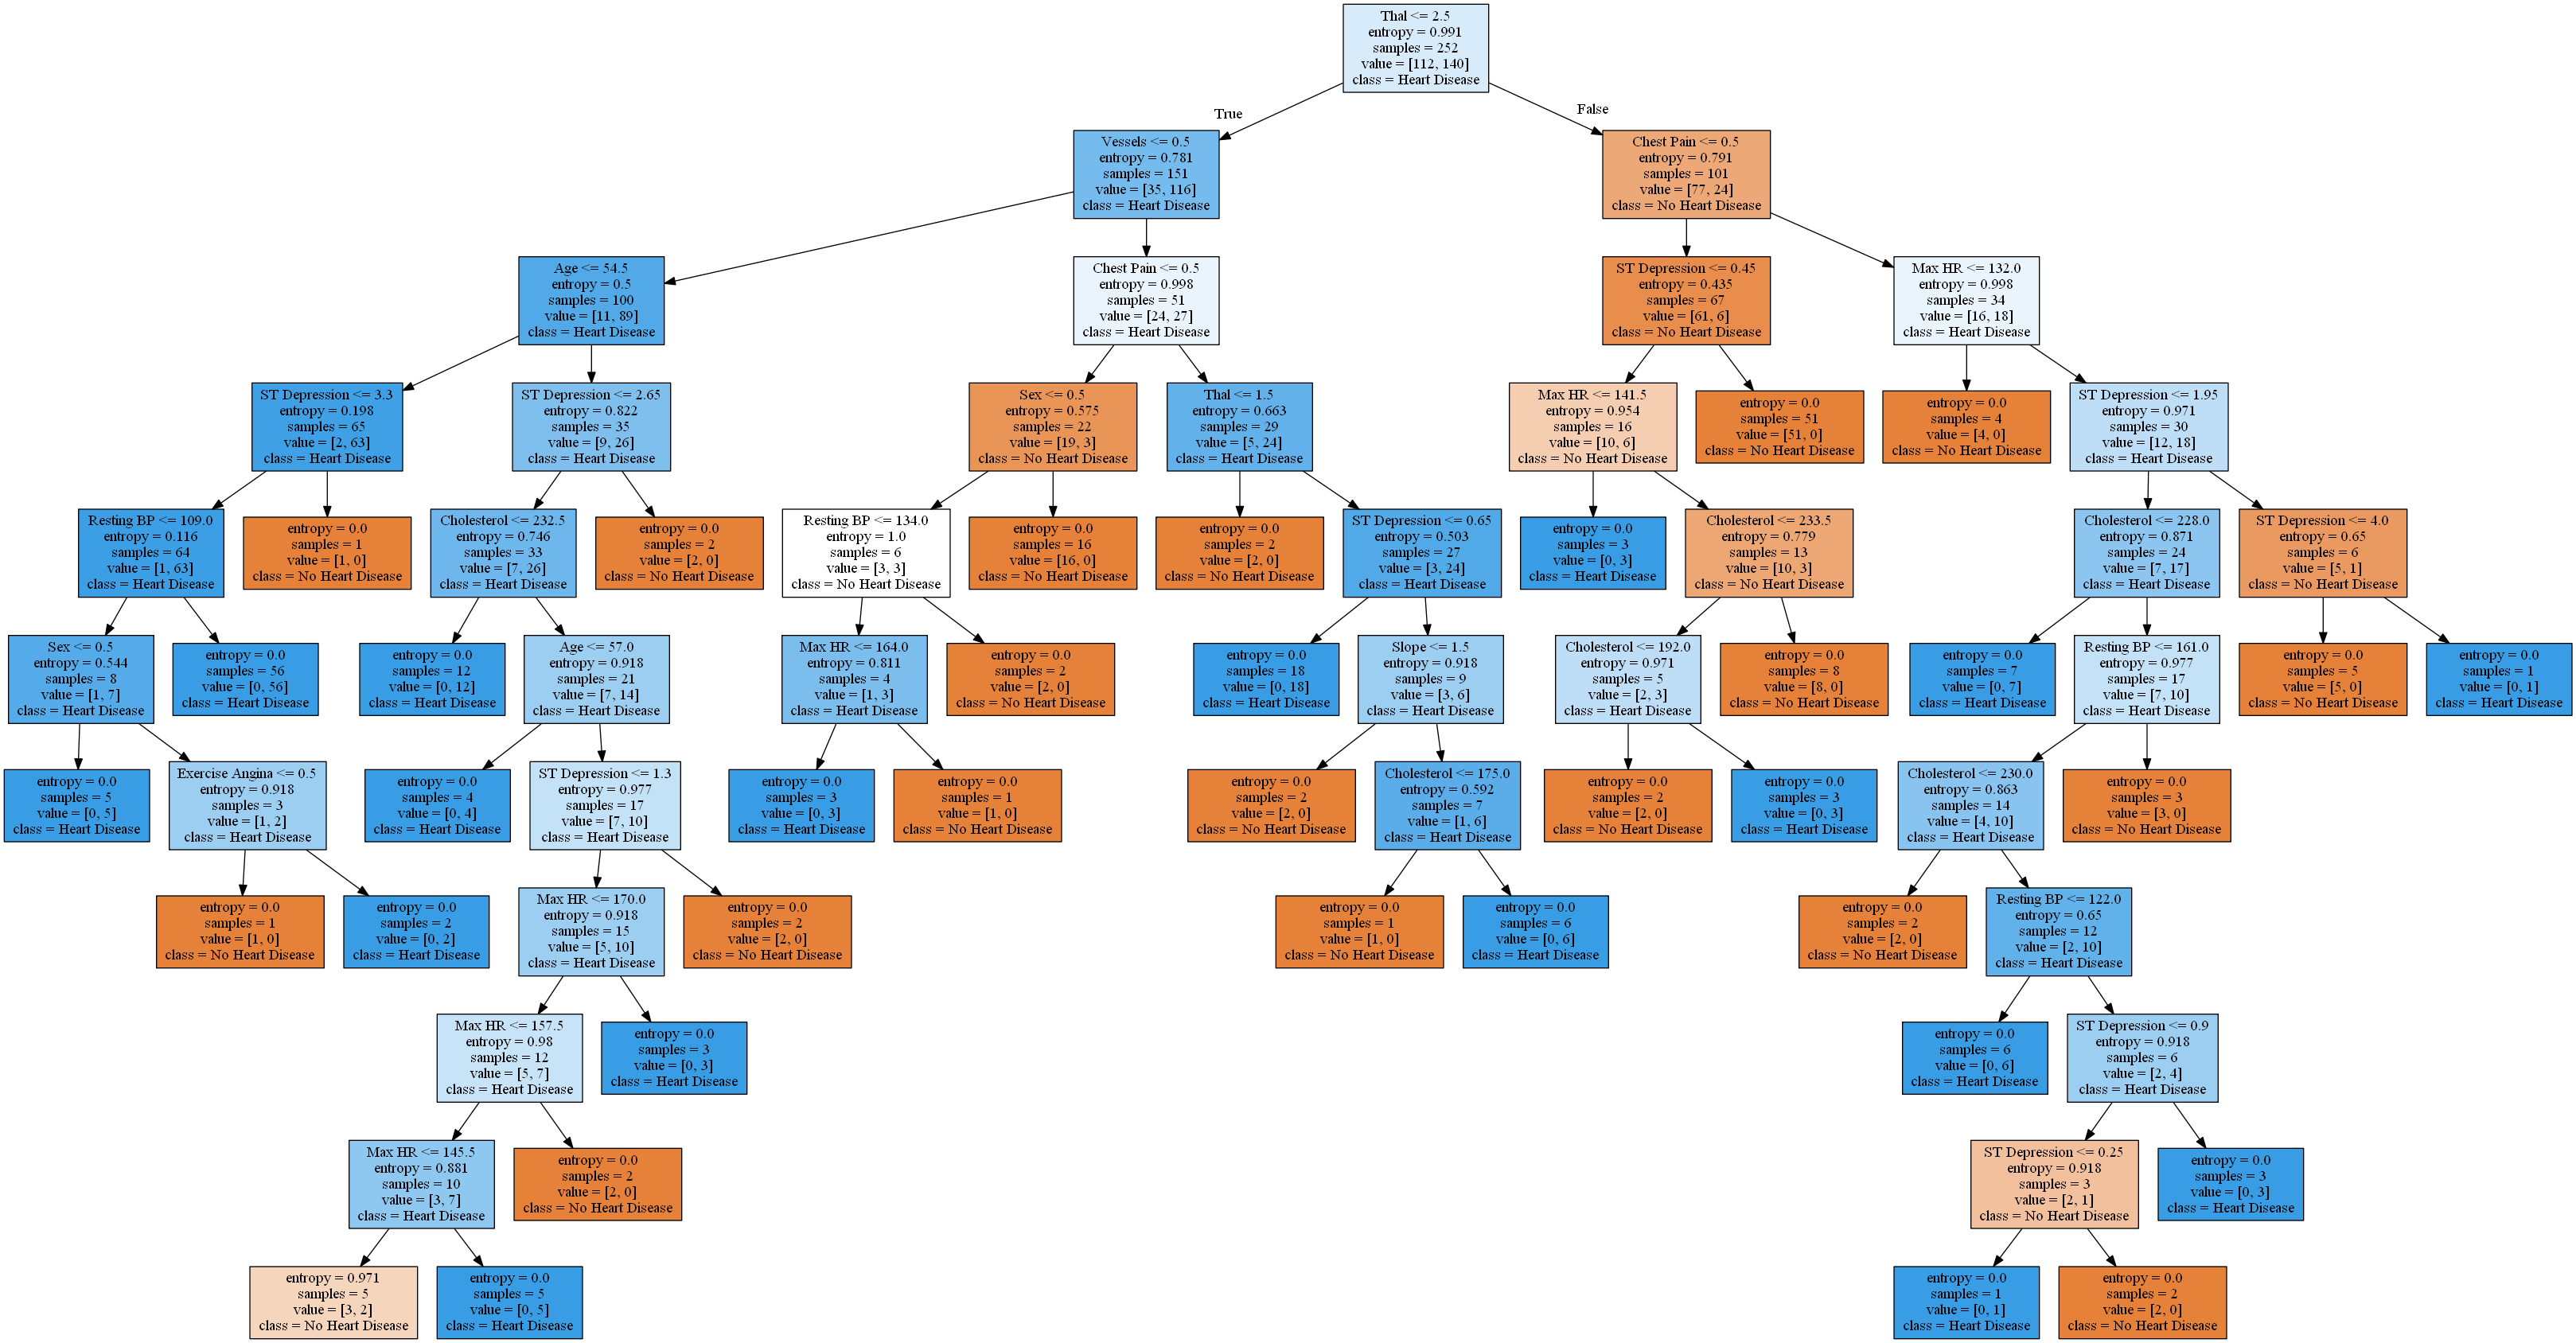

In [61]:
# Creating the decision tree visual
import pydotplus
from IPython.display import Image

features = ['Age', 'Sex', 'Chest Pain', 'Resting BP', 'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max HR', 'Exercise Angina', 'ST Depression', 'Slope', 'Vessels', 'Thal']
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features, class_names = ['No Heart Disease', 'Heart Disease'], filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [62]:
# Training Process

pred_DT_train = clf.predict(xTrain)
print("Training accuracy:", accuracy_score(yTrain, pred_DT_train))

Training accuracy: 0.9920634920634921


In [63]:
# Make predictions on test data

prediction = clf.score(xTest, yTest, sample_weight=None)
prediction = clf.predict(xTest)

print("Test accuracy:", accuracy_score(yTest, prediction))

Test accuracy: 0.66


In [64]:
# confusion_matrix(y_true, y_pred) for test data

confusion_matrix(yTest, prediction)

array([[13, 12],
       [ 5, 20]], dtype=int64)

In [65]:
# Classification report
# Link: http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix

from sklearn.metrics import classification_report


target_names = [ 'non-heart disease patient' , 'heart disease patient']
print(classification_report(yTest, prediction, target_names = target_names))

                           precision    recall  f1-score   support

non-heart disease patient       0.72      0.52      0.60        25
    heart disease patient       0.62      0.80      0.70        25

                 accuracy                           0.66        50
                macro avg       0.67      0.66      0.65        50
             weighted avg       0.67      0.66      0.65        50



In [66]:
# https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=False,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    #if xyplotlabels:
    #    plt.ylabel('True label')
    #    plt.xlabel('Predicted label' + stats_text)
    #else:
    #    plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

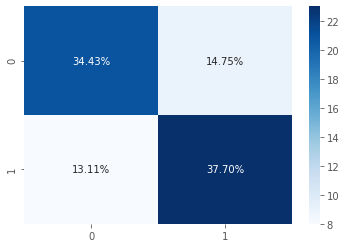

In [55]:
make_confusion_matrix(confusion_matrix(yTest, prediction),)